# Sentimental Analysis using Recurrent Neural Networks 

#**Main Objective**

Through this project we are performing sentimental analysis of comments using sample datasets of RateMyProfessors website. Our primary goal is to predict the quality and difficulty scores for professor's teaching based on the comments provided by students.

#**Tasks we performed:**

1. Data Collection
2. Data Preprocessing
3. Word Emebeddings using glove and word2vec
4. Split the datasets into training and testing sets
5. Train the main model
6. Analyse the results by comparing the models and select the best model for prediction







# **Task 1 : Data Collection**


1) Mount new drive into google colab and add datasets into new drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2) Read data from CSV File RateMyProfessor_Sample data.csv and store it into Panda Dataframe

In [ ]:
csvFile = '/content/drive/MyDrive/RateMyProfessor_Sample data.csv'
import pandas as pd

3) Read columns for quality ,difficulty and comments and store it into Panda dataframe

In [ ]:

df1 = pd.read_csv(csvFile, usecols=['comments','student_star', 'student_difficult'])

4) Print first 5 rows of dataframe


In [ ]:
df1.head()

,student_star,student_difficult,comments
0,5.0,3.0,"This class is hard, but its a two-in-one gen-e..."
1,5.0,2.0,Definitely going to choose Prof. Looney\'s cla...
2,4.0,3.0,I overall enjoyed this class because the assig...
3,5.0,3.0,"Yes, it\'s possible to get an A but you\'ll de..."
4,5.0,1.0,Professor Looney has great knowledge in Astron...


5) Rename Columns of dataframe to maintain consistency

In [ ]:
df1 = df1.rename(columns={'comments': 'comments', 'student_star': 'quality', 'student_difficult': 'difficulty'})

6) Verify column change and data

In [ ]:

df1.head()

,quality,difficulty,comments
0,5.0,3.0,"This class is hard, but its a two-in-one gen-e..."
1,5.0,2.0,Definitely going to choose Prof. Looney\'s cla...
2,4.0,3.0,I overall enjoyed this class because the assig...
3,5.0,3.0,"Yes, it\'s possible to get an A but you\'ll de..."
4,5.0,1.0,Professor Looney has great knowledge in Astron...


7) Fetch the count of missing values

In [ ]:
df1.isnull().sum()

quality       5
difficulty    5
comments      7
dtype: int64

8) Use glom library for data transformation 

In [ ]:
!pip install glom
from glom import glom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


9) Read json file all_reviews.json and store it in panda dataframe 
This will be our second dataset

In [ ]:

jsonFile = '/content/drive/MyDrive/all_reviews.json'
df2 = pd.read_json(jsonFile)


In [ ]:
df2 = pd.DataFrame({
    'comments': df2[0].apply(lambda row: glom(row, 'Comment')), 
    'quality': df2[0].apply(lambda row: glom(row, 'Quality')), 
    'difficulty': df2[0].apply(lambda row: glom(row, 'Difficulty'))})


10) Display contents of second dataset

In [ ]:
df2.head()

,comments,quality,difficulty
0,Professor Nichols is super nice and very whole...,5.0,2.0
1,"Prof Humes is really knowledgeable, but her le...",4.0,4.0
2,If you fall behind it's almost impossible to c...,3.0,4.0
3,Prof. Meyer is intensely brilliant and provoke...,4.5,4.0
4,Would not recommend taking him for fhs or even...,1.0,4.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comments    288 non-null    object
 1   quality     288 non-null    object
 2   difficulty  288 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [ ]:
df2['quality'] = df2['quality'].astype('float32')
df2['difficulty'] = df2['difficulty'].astype('float32')

11) Check for null values in dataframe 

In [ ]:
df2.isnull().sum()

comments      0
quality       0
difficulty    0
dtype: int64

12) Create a dataframe using web scrapping

In [ ]:
!pip install RateMyProfessorAPI 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ratemyprofessor
professor = ratemyprofessor.get_professor_by_school_and_name(ratemyprofessor.get_school_by_name('California State University-Fullerton'),'Kenytt Avery')

13)Display the contents of this dataset

In [ ]:
print("Professor name = ",professor.name)
print("Professor Ratings =", professor.rating)
print("Professor Difficulty=", professor.difficulty)

Professor name =  Kenytt Avery
Professor Ratings = 3.6
Professor Difficulty= 4


In [ ]:
comments = []
quality = []
difficulty = []
for rating in professor.get_ratings():
  comments.append(rating.comment)
  quality.append(rating.rating)
  difficulty.append(rating.difficulty)
print("First 5 comments")
print(comments[:5])
print("First 5 ratings")
print(quality[:5])
print("First 5 difficulty")
print(difficulty[:5])

First 5 comments
["He teaches NOTHING during lecture, no code, no helpful lecture. Not Grading for the whole semester and he'll grade it after final project. Member of project are random. Project 1 is at almost first half semester, and Project 2,3,4 are on the last month of semester WHYY. Please AVOID at all COST and don't believe in positive review.", "One of the best professors at csuf for cs department in my opinion. Just make sure to keep up with the learning material and don't miss any assignments because they build on top of each other concept wise. ", 'He does not grade until the end of the semester, until then you have no idea what your grade will be. Only group projects built around one big project, final group was randomized for no reason. He doesnt teach ANY code during lecture, only office hours (essential for projects). Lectures are useless, better off learning from youtube. AVOID PLEASE.\n', "Very knowledgeable about the topic he teaches, however the lectures are relative

In [ ]:
dataframe = {'comments':comments,'quality':quality,'difficulty':difficulty}
df3 = pd.DataFrame(dataframe)
df3.head()

,comments,quality,difficulty
0,"He teaches NOTHING during lecture, no code, no...",1,5
1,One of the best professors at csuf for cs depa...,5,4
2,He does not grade until the end of the semeste...,1,5
3,"Very knowledgeable about the topic he teaches,...",2,4
4,"He doesn't grade anything all semester, so you...",2,5


14) Change the data type of quality and difficulty attributes to float32 

In [ ]:
df3['quality'] = df3['quality'].astype('float32')
df3['difficulty'] = df3['difficulty'].astype('float32')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comments    50 non-null     object 
 1   quality     50 non-null     float32
 2   difficulty  50 non-null     float32
dtypes: float32(2), object(1)
memory usage: 928.0+ bytes


15) Combine all 3 panda dataframes to create one single dataframe

In [ ]:
df = df1.append(df2)
df = df.append(df3)
df.head()

<ipython-input-301-e542b627fe56>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
<ipython-input-301-e542b627fe56>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)


,quality,difficulty,comments
0,5.0,3.0,"This class is hard, but its a two-in-one gen-e..."
1,5.0,2.0,Definitely going to choose Prof. Looney\'s cla...
2,4.0,3.0,I overall enjoyed this class because the assig...
3,5.0,3.0,"Yes, it\'s possible to get an A but you\'ll de..."
4,5.0,1.0,Professor Looney has great knowledge in Astron...


16) Verify total no of rows in a dataframe

In [ ]:
df.shape

(20338, 3)

17) Check for null values and drop them if exist

In [ ]:
df.isnull().sum()

quality       5
difficulty    5
comments      7
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(20331, 3)

In [ ]:
df.reset_index(inplace=True)

# **Task 2: Data Preprocessing**
1. Remove digits
2. Remove extra spaces
3. Remove emojis
4. Convert to lower case
5. Lemmalization
6. Store in list
7. Deal with missing data

1) Import all dependencies

In [ ]:
#import packages for regular expressions and emojis
!pip install contractions
import re
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re 
from nltk.stem import WordNetLemmatizer
import gensim
import nltk
import contractions
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2) Defining functions to clean Data (As a part of preprocessing)

In [ ]:
def remove_links(text):
  return re.sub(r"(?:\@|https?\://)\S+", "", str(text))

def remove_email(text):
  return re.sub(r'\S+@\S+', '', text)

def remove_extra_spaces(text):
  return re.sub(' +',' ',text)

def remove_extra_line(text):
  return re.sub('\n+',' ',text)

def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

def remove_digits(text):
  return re.sub('[^a-zA-Z]',' ',text)

def convert_lower(text):
  return text.lower()

def tokenize(text):
  return text.split()


3) Define function to remove stopwords

In [ ]:
#fetch stopwords from predefined library
stop_words = stopwords.words('english')

#write a function to remove stopwords
def remove_stop_words(data): 
  filtered_words=[]
  for word in data:
    if word not in stop_words:
      filtered_words.append(word)

  return filtered_words

4) Apply preprocessing techniques and perform lemmatization by removing stopwords



In [ ]:
#Lemmelization
corpus=[]
for i in range(len(df)):
  text = remove_links(str(df['comments'][i]))
  text = remove_email(text)
  text = remove_extra_spaces(text)
  text = remove_extra_line(text)
  text = expand_contractions(text)
  text = remove_digits(text)
  text = convert_lower(text)
  text = tokenize(text)
  lm=WordNetLemmatizer()
  text = [lm.lemmatize(word) for word in text if word not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)
corpus[:5]

['class hard two one gen ed knockout content stimulating unlike class actually participate pas section easy offer extra credit every week funny dude much say',
 'definitely going choose prof looney class interesting class easy bring note exam need remember lot lot bonus point available observatory session awesome',
 'overall enjoyed class assignment straightforward interesting enjoy video project felt like one group cared enough help',
 'yes possible get definitely work content pretty interesting tog get super organized class multiple thing due every week ton lecture go possible would avoid class week course definitely always somethingto class',
 'professor looney great knowledge astronomy explain super easy way elementary class taught class great passion great illustration class definitely fun take interested knowledge class cover hesitate ask great teacher']

# **Task 3: Word Embedding**
1. Convert words to vector \
1a. Using GloVe \
1b. Using word2vec
2. Train network





# **1a. Using Glove**

1) Import the dependencies

In [ ]:
import os
import urllib.request
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tqdm import tqdm

2) Download pre-trained model for glove from https://nlp.stanford.edu/projects/glove/

In [ ]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7f88b691c250>)

In [ ]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


3) 
* Create a dictionary containing every word and its 
corresponding vector.
* Loop through the file and extract word and vectors

In [ ]:
embedded_dictionary = {}
#with open('/content/glove.6B.200d.txt','r') as f:
with open('/content/glove.6B.200d.txt','r') as f:

  for line in f:
    newvalues = line.split()
    word = newvalues[0]
    vector = np.asarray(newvalues[1:],'float32')
    embedded_dictionary[word]=vector

4) Display embeddings for word bad

In [ ]:
embedded_dictionary['bad']

array([ 1.9733e-01, -3.6513e-01, -4.4720e-02, -1.5762e-01, -5.2375e-01,
        1.2399e-01, -6.8523e-01, -3.3183e-01,  4.5466e-01,  6.6316e-01,
       -1.8251e-02,  2.1219e-01,  2.8740e-02, -1.4164e-01,  4.6345e-01,
        3.1726e-01, -5.8831e-01,  4.2796e-01,  4.5681e-02, -4.9805e-01,
        1.7164e-01,  2.4047e+00, -3.7963e-01,  8.2891e-02, -2.7570e-01,
       -6.8935e-01,  2.8693e-01,  1.3462e-01, -3.8978e-01, -3.6450e-01,
        1.6104e-01, -3.8947e-01, -6.7416e-01,  3.4876e-01, -2.5767e-01,
        7.6081e-02, -7.5393e-01, -4.2013e-01, -2.2229e-01,  8.3082e-02,
        4.5537e-01, -2.4032e-01, -2.4604e-01,  7.1795e-01,  4.3490e-01,
       -1.4638e-01,  2.5804e-01, -5.0251e-02, -2.0919e-01,  5.3911e-01,
        5.5961e-02,  8.5284e-02,  1.2690e-01, -1.1956e-01,  1.9526e-01,
       -1.0273e-01, -2.6263e-01,  1.5539e-01,  1.2326e-01, -3.6314e-01,
        1.1937e-01, -2.9376e-01, -4.3331e-01,  1.7554e-01, -1.9433e-01,
        4.2875e-01, -3.1927e-02,  7.6411e-02,  9.1824e-01,  5.20

5) Find Maximum No of words from sequences of comments.
We will use it as a parameter input length/sequence length while training the model

In [ ]:
# split each sentence in the 'df['comments']' column into a list of words and find the maximum no of words from sentences
df['comments']=corpus
max_words = df['comments'].str.split().apply(len).max()

# print the maximum number of words
print('Maximum number of words:', max_words)

Maximum number of words: 76


6) Tokenize and Pad Sequences so that every sequence will have equal no of words 

In [ ]:
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

comments_pad=pad_sequences(sequences,maxlen=max_words,truncating='post',padding='post')
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))



Number of unique words: 14403


7) Create embedding matrix using glove where every word will be represented with 200 dims

In [ ]:
emedding_dim=200
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,emedding_dim))

In [ ]:
print(type(comments_pad))
print(comments_pad.dtype)


<class 'numpy.ndarray'>
int32


8) Converting feature vector of all inputs into dtype float32

In [ ]:
new_comments = np.array(comments_pad, dtype=np.float32)
new_quality=np.array(df['quality'], dtype=np.float32)
new_difficulty=np.array(df['difficulty'],dtype=np.float32)


9) Verify the data types

In [ ]:
print(new_comments.dtype)
print(new_quality.dtype)
print(new_difficulty.dtype)

float32
float32
float32


10) Check the shape of matrix

In [ ]:
embedding_matrix.shape

(14404, 200)

11) Convert dataset into sequence of words and apply word embeddings on those sequences

In [ ]:
#function to get word embedding
def get_embedding(word):
    if word in embedded_dictionary:
        return embedded_dictionary[word]
    else:
        return np.zeros((100,))

#**Task 4: Split Data into training and testing set : Using Glove Embeddings**

In [ ]:
Y = np.stack((new_quality, new_difficulty),axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_comments, Y, test_size=0.2)


#**Task 5: Train the Model using RNN and glove embeddings**

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Input
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional,SpatialDropout1D,BatchNormalization,GRU
from keras.initializers import Constant
from keras.regularizers import l2

In [ ]:
model1 = keras.Sequential([
    keras.layers.Embedding(num_words, 200, embeddings_initializer=Constant(embedding_matrix),
                   input_length=max_words),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(128, activation='relu', return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(64, activation='relu', return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])


In [ ]:
model1.compile(optimizer='adam',loss="mse",metrics=['mse', 'mae'])


In [ ]:
#Fit the model 
model1.fit(X_train, Y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
115/115 [==============================] - 117s 959ms/step - loss: 12.6087 - mse: 12.6087 - mae: 3.2538 - val_loss: 12.1325 - val_mse: 12.1325 - val_mae: 3.1826
Epoch 2/10
115/115 [==============================] - 105s 918ms/step - loss: 11.8838 - mse: 11.8838 - mae: 3.1404 - val_loss: 11.4299 - val_mse: 11.4299 - val_mae: 3.0702
Epoch 3/10
115/115 [==============================] - 98s 852ms/step - loss: 11.1965 - mse: 11.1965 - mae: 3.0291 - val_loss: 10.7644 - val_mse: 10.7644 - val_mae: 2.9599
Epoch 4/10
115/115 [==============================] - 103s 894ms/step - loss: 10.5452 - mse: 10.5452 - mae: 2.9195 - val_loss: 10.1335 - val_mse: 10.1335 - val_mae: 2.8513
Epoch 5/10
115/115 [==============================] - 104s 904ms/step - loss: 9.9285 - mse: 9.9285 - mae: 2.8119 - val_loss: 9.5368 - val_mse: 9.5368 - val_mae: 2.7447
Epoch 6/10
115/115 [==============================] - 86s 749ms/step - loss: 9.3448 - mse: 9.3448 - mae: 2.7062 - val_loss: 8.9720 - val_mse: 8.9

In [ ]:
y_prediction= model1.predict(X_test)

382/382 [==============================] - 4s 6ms/step


In [ ]:
y_prediction[:5]

array([[3.5273361],
       [3.5273361],
       [3.5273361],
       [3.5273361],
       [3.5273361]], dtype=float32)

## **Trained Model with Glove Embeddings that shows good results**

By training this model with Bidirectional GRU's and by adding some dropout layers , we were able to achieve upto mse upto 0.4 and validation mse upto 0.8. This model is working good for glove emebddings.

In [ ]:

from keras.layers import LSTM
model2= Sequential([
Embedding(num_words,200,input_length=max_words),
    SpatialDropout1D(0.4),
    Bidirectional(GRU(128,return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(64)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32,activation="relu"),
    Dense(2,activation="linear")
])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 76, 200)           3359800   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 76, 200)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_10 (Bidirecti  (None, 76, 256)          253440    
 onal)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 76, 256)           0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              123648    
 onal)                                                           
                                                      

In [ ]:
model2.compile(optimizer='adam',loss="mse",metrics=['mse', 'mae'])


In [ ]:
model2.fit(X_train, Y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
344/344 [==============================] - 49s 109ms/step - loss: 1.8759 - mse: 1.8759 - mae: 1.0835 - val_loss: 1.0765 - val_mse: 1.0765 - val_mae: 0.8218
Epoch 2/10
344/344 [==============================] - 15s 45ms/step - loss: 0.9888 - mse: 0.9888 - mae: 0.7822 - val_loss: 1.0394 - val_mse: 1.0394 - val_mae: 0.8216
Epoch 3/10
344/344 [==============================] - 13s 37ms/step - loss: 0.7892 - mse: 0.7892 - mae: 0.6882 - val_loss: 0.9187 - val_mse: 0.9187 - val_mae: 0.7624
Epoch 4/10
344/344 [==============================] - 11s 31ms/step - loss: 0.6634 - mse: 0.6634 - mae: 0.6223 - val_loss: 1.0040 - val_mse: 1.0040 - val_mae: 0.8087
Epoch 5/10
344/344 [==============================] - 10s 29ms/step - loss: 0.5917 - mse: 0.5917 - mae: 0.5803 - val_loss: 0.9058 - val_mse: 0.9058 - val_mae: 0.7570
Epoch 6/10
344/344 [==============================] - 10s 28ms/step - loss: 0.5337 - mse: 0.5337 - mae: 0.5458 - val_loss: 0.9039 - val_mse: 0.9039 - val_mae: 0.7564
Epo

In [ ]:
#Predicted Labels
pred2 = model2.predict(X_test)
pred2[:5]

382/382 [==============================] - 5s 9ms/step


array([[3.2843676 , 3.0867293 ],
       [4.2647133 , 0.94531024],
       [3.6990047 , 3.513675  ],
       [1.3723811 , 2.6331584 ],
       [3.7967346 , 3.489458  ]], dtype=float32)

In [ ]:
#Actual Labels
Y_test[:5]

array([[4., 4.],
       [5., 1.],
       [5., 3.],
       [2., 3.],
       [5., 5.]], dtype=float32)

**Here predicted labels and actual labels are somewhat matching.**



#**One hot encoding**

1.   One hot encoding is used to convert the sentences into the numerical values. Each word in each sentences converted ranging from 0 to total unique words in dataset. 
2.   After that, we performed the the padding to make each sentence of same length by finding maximum length of sentence



In [ ]:
#importing preprocessing libraries
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#performed one hot encoding
voc_size = len(set(corpus))
one_hot_repr = [one_hot(words,voc_size) for words in corpus]
one_hot_repr[:5]

[[6471,
  46292,
  45537,
  24437,
  22678,
  49604,
  17103,
  5966,
  5240,
  9340,
  6471,
  32791,
  7320,
  28489,
  37765,
  49357,
  9126,
  11149,
  3958,
  33541,
  35539,
  3255,
  47132,
  26023,
  31748],
 [46099,
  18533,
  8215,
  31414,
  5779,
  6471,
  44418,
  6471,
  49357,
  7780,
  13487,
  44949,
  24910,
  24945,
  25768,
  25768,
  2703,
  8799,
  32644,
  25470,
  49398,
  15845],
 [2977,
  8989,
  6471,
  22519,
  20114,
  44418,
  15215,
  27989,
  24568,
  4700,
  18358,
  24437,
  21889,
  12289,
  30665,
  3309],
 [14082,
  25816,
  8961,
  46099,
  29830,
  5966,
  44487,
  44418,
  493,
  8961,
  40353,
  10187,
  6471,
  1379,
  12573,
  23328,
  33541,
  35539,
  48813,
  2796,
  18569,
  25816,
  36008,
  1636,
  6471,
  35539,
  18651,
  46099,
  18791,
  46106,
  6471],
 [31248,
  5779,
  39874,
  41226,
  6124,
  4457,
  40353,
  49357,
  32036,
  12402,
  6471,
  19727,
  6471,
  39874,
  29816,
  39874,
  18855,
  6471,
  46099,
  26224,
  35322,

In [ ]:
#Performed padding
sent_len = max([len(sent) for sent in corpus])
embedded_docs = pad_sequences(one_hot_repr,padding="post",maxlen=sent_len)
embedded_docs[0]

array([ 6471, 46292, 45537, 24437, 22678, 49604, 17103,  5966,  5240,
        9340,  6471, 32791,  7320, 28489, 37765, 49357,  9126, 11149,
        3958, 33541, 35539,  3255, 47132, 26023, 31748,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#storing quality and difficulty in different list
rating = []
difficulty = []
for index,row in df.iterrows():
    if type(row["comments"]) == str:
        rating.append(row["quality"])
        difficulty.append(row["difficulty"])
print(len(rating))
print(len(difficulty))

60993
60993


In [ ]:
#Preparing X and Y
import numpy as np
X = np.array(embedded_docs)
Y = np.stack((rating,difficulty),axis=1)

In [ ]:
#Spliting the data into train and test by spliting ratio of 75-25%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [ ]:
#import keras libraries
from keras.models import Sequential
from keras.layers import Flatten,Input
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional,SpatialDropout1D,BatchNormalization,GRU
from keras.initializers import Constant
from keras.regularizers import l2

In [ ]:
#Build the model
model = Sequential([
    Embedding(voc_size,100,input_length=sent_len),
    Bidirectional(GRU(64,return_sequences=True)),
    Dropout(0.4),
    Bidirectional(GRU(32)),
    Dropout(0.4),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dense(2,activation="linear")
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 405, 100)          5014700   
                                                                 
 bidirectional_12 (Bidirecti  (None, 405, 128)         63744     
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 405, 128)          0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               31104     
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)             

In [ ]:
#compiled the model
model.compile(optimizer="adam",loss="mse")

In [ ]:
#Fit the model on training data
history=model.fit(x_train,y_train,epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
1287/1287 [==============================] - 117s 83ms/step - loss: 1.7431 - val_loss: 1.3868
Epoch 2/10
1287/1287 [==============================] - 73s 57ms/step - loss: 0.9720 - val_loss: 1.1676
Epoch 3/10
1287/1287 [==============================] - 72s 56ms/step - loss: 0.7540 - val_loss: 1.1457
Epoch 4/10
1287/1287 [==============================] - 72s 56ms/step - loss: 0.6396 - val_loss: 0.9817
Epoch 5/10
1287/1287 [==============================] - 69s 54ms/step - loss: 0.5662 - val_loss: 0.9436
Epoch 6/10
1287/1287 [==============================] - 72s 56ms/step - loss: 0.5100 - val_loss: 0.9295
Epoch 7/10
1287/1287 [==============================] - 69s 54ms/step - loss: 0.4674 - val_loss: 0.8897
Epoch 8/10
1287/1287 [==============================] - 71s 55ms/step - loss: 0.4322 - val_loss: 0.8619
Epoch 9/10
1287/1287 [==============================] - 69s 54ms/step - loss: 0.4035 - val_loss: 0.7799
Epoch 10/10
1287/1287 [==============================] - 70s 55

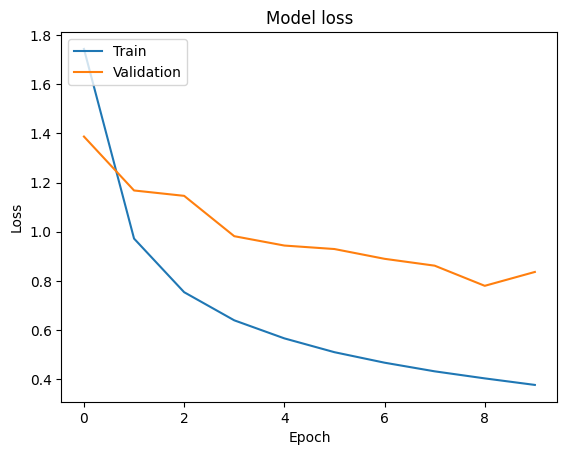

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Make predictions
pred = model.predict(x_test)
pred[:5]

477/477 [==============================] - 14s 27ms/step


array([[1.8876605, 3.7087598],
       [3.9427278, 3.2785344],
       [3.3221188, 2.9812076],
       [2.4894245, 2.9957952],
       [3.56857  , 4.0621433]], dtype=float32)

In [ ]:
#Actual values for comparison
print("Actual rating")
print(y_train[:5])


Actual rating
[[4.5 3. ]
 [2.5 4. ]
 [1.  3. ]
 [5.  3. ]
 [1.  5. ]]


**As per the results the Mean square error for training is low 0.3770 and mean square error for validation is 0.8363 which is higher than the previous one. Also, the training loss is reducing exponentially while validation loss going reduced and went upward that shows overfitting**

# **Data Augmentation**
As you see the above results in overfitting, to avoid that we added the text augmentsation part using two methods. For that we have used inbuilt library nlpaug

1.   Inserting Synonymes:
> We inserted the synonames for each sentence in the dataframe by using SynonymAug function which inserts synonymes to maximum 3 words for each sentence



2.   Swapping the random words in sentences:
> We swapped the words from each sentence using RandomWordAug with action parameter as swap




In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import nlpaug library
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [ ]:
#define the augmentors
aug = naw.SynonymAug(aug_src="wordnet",aug_max=3)
aug1 = naw.RandomWordAug(action='swap')

In [ ]:
#defined two dataframes for augmentation
synaug_df = pd.DataFrame(columns=['comments','quality','difficulty'])
swapaug_df = pd.DataFrame(columns=['comments','quality','difficulty'])

In [ ]:
#Augment by inserting synonymes
aug_text = []
for idx,row in df.iterrows():
  aug_data = {}
  aug_sent = aug.augment(row["comments"])
  aug_data["comments"] = aug_sent
  aug_data["quality"] = row["quality"]
  aug_data["difficulty"] = row["difficulty"]
  aug_data_df = pd.DataFrame([aug_data])
  synaug_df = pd.concat([synaug_df, aug_data_df], ignore_index = True)


In [ ]:
synaug_df.shape

(20331, 3)

In [ ]:
#Augment by swapping the words
aug_text = []
for idx,row in df.iterrows():
  aug_data = {}
  aug_sent = aug1.augment(row["comments"])
  aug_data["comments"] = aug_sent
  aug_data["quality"] = row["quality"]
  aug_data["difficulty"] = row["difficulty"]
  aug_data_df = pd.DataFrame([aug_data])
  swapaug_df = pd.concat([swapaug_df, aug_data_df], ignore_index = True)


In [ ]:
swapaug_df.shape

(20331, 3)

In [ ]:
#concate the dataframe 
df = pd.concat([df, synaug_df], ignore_index = True)
df = pd.concat([df, swapaug_df], ignore_index = True)
df.shape

(60993, 4)

In [ ]:
df.head()
#df = df.drop(['index'],axis=1)

,index,quality,difficulty,comments
0,0.0,5.0,3.0,"This class is hard, but its a two-in-one gen-e..."
1,1.0,5.0,2.0,Definitely going to choose Prof. Looney\'s cla...
2,2.0,4.0,3.0,I overall enjoyed this class because the assig...
3,3.0,5.0,3.0,"Yes, it\'s possible to get an A but you\'ll de..."
4,4.0,5.0,1.0,Professor Looney has great knowledge in Astron...


In [ ]:
df.head()

,index,quality,difficulty,comments
0,0.0,5.0,3.0,"This class is hard, but its a two-in-one gen-e..."
1,1.0,5.0,2.0,Definitely going to choose Prof. Looney\'s cla...
2,2.0,4.0,3.0,I overall enjoyed this class because the assig...
3,3.0,5.0,3.0,"Yes, it\'s possible to get an A but you\'ll de..."
4,4.0,5.0,1.0,Professor Looney has great knowledge in Astron...


In [ ]:
df.isnull().sum()

index         40662
quality           0
difficulty        0
comments          0
dtype: int64

In [ ]:
#performed data preprocessing
corpus=[]
for i in range(len(df)):
  text = remove_links(str(df['comments'][i]))
  text = remove_email(text)
  text = remove_extra_spaces(text)
  text = remove_extra_line(text)
  text = expand_contractions(text)
  text = remove_digits(text)
  text = convert_lower(text)
  text = tokenize(text)
  text = [lm.lemmatize(word) for word in text if word not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)
corpus[:5]

['class hard two one gen ed knockout content stimulating unlike class actually participate pas section easy offer extra credit every week funny dude much say',
 'definitely going choose prof looney class interesting class easy bring note exam need remember lot lot bonus point available observatory session awesome',
 'overall enjoyed class assignment straightforward interesting enjoy video project felt like one group cared enough help',
 'yes possible get definitely work content pretty interesting tog get super organized class multiple thing due every week ton lecture go possible would avoid class week course definitely always somethingto class',
 'professor looney great knowledge astronomy explain super easy way elementary class taught class great passion great illustration class definitely fun take interested knowledge class cover hesitate ask great teacher']

In [ ]:
#Performed one hot encoding
voc_size = len(set(corpus))
one_hot_repr = [one_hot(words,voc_size) for words in corpus]
one_hot_repr[:5]

[[29452,
  12689,
  3570,
  37948,
  46982,
  27976,
  6037,
  3566,
  21567,
  10695,
  29452,
  39105,
  31282,
  20722,
  15501,
  25448,
  12639,
  8530,
  43198,
  11750,
  8495,
  30389,
  35672,
  12741,
  31820],
 [26577,
  48050,
  23621,
  16592,
  8134,
  29452,
  33814,
  29452,
  25448,
  21189,
  1652,
  8657,
  47960,
  34816,
  19184,
  19184,
  23306,
  46611,
  19347,
  29018,
  27079,
  8195],
 [45421,
  31188,
  29452,
  6253,
  33932,
  33814,
  558,
  46467,
  32222,
  31486,
  16440,
  37948,
  37800,
  42745,
  33872,
  10540],
 [44970,
  26924,
  40447,
  26577,
  27173,
  3566,
  39648,
  33814,
  660,
  40447,
  12752,
  26736,
  29452,
  10141,
  40551,
  48946,
  11750,
  8495,
  39455,
  33204,
  45008,
  26924,
  49826,
  9834,
  29452,
  8495,
  10027,
  26577,
  833,
  11902,
  29452],
 [3228,
  8134,
  46155,
  9284,
  4105,
  29458,
  12752,
  25448,
  48232,
  25252,
  29452,
  37853,
  29452,
  46155,
  49995,
  46155,
  15220,
  29452,
  26577,
  3

In [ ]:
#Performed Padding
sent_len = max([len(sent) for sent in corpus])
embedded_docs = pad_sequences(one_hot_repr,padding="post",maxlen=sent_len)
embedded_docs[0]

array([29452, 12689,  3570, 37948, 46982, 27976,  6037,  3566, 21567,
       10695, 29452, 39105, 31282, 20722, 15501, 25448, 12639,  8530,
       43198, 11750,  8495, 30389, 35672, 12741, 31820,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
#store the quality and difficulty in lists
rating = []
difficulty = []
for index,row in df.iterrows():
    #if type(row["comments"]) == str:
    rating.append(row["quality"])
    difficulty.append(row["difficulty"])

print(len(rating))
print(len(difficulty))

60993
60993


In [ ]:
#Prepare the X and Y
X = np.array(embedded_docs)
Y = np.stack((rating,difficulty),axis=1)

In [ ]:
#Y=np.array(Y,dtype='float32')

In [ ]:
#Spliting the data with split ratio of 75-25%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=42)


In [ ]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, GRU, Bidirectional
model = Sequential([
    Embedding(voc_size,100,input_length=sent_len),
    Bidirectional(GRU(64,return_sequences=True)),
    Bidirectional(GRU(32)),
    Dropout(0.5),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(2,activation="linear")
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 411, 100)          5012200   
                                                                 
 bidirectional_16 (Bidirecti  (None, 411, 128)         63744     
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 64)               31104     
 onal)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 32)              

In [ ]:
#compile the model
model.compile(optimizer="Adam",loss="mse",metrics=['mae'])

In [ ]:
pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#fit the model on training data
history = model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128,verbose=1,shuffle=True)

Epoch 1/10
286/286 [==============================] - 77s 211ms/step - loss: 2.2472 - mae: 1.2060 - val_loss: 1.2104 - val_mae: 0.8944
Epoch 2/10
286/286 [==============================] - 29s 100ms/step - loss: 1.1031 - mae: 0.8378 - val_loss: 1.6533 - val_mae: 1.0806
Epoch 3/10
286/286 [==============================] - 24s 84ms/step - loss: 0.8593 - mae: 0.7258 - val_loss: 1.5856 - val_mae: 1.0624
Epoch 4/10
286/286 [==============================] - 21s 74ms/step - loss: 0.7095 - mae: 0.6480 - val_loss: 1.3974 - val_mae: 0.9837
Epoch 5/10
286/286 [==============================] - 24s 83ms/step - loss: 0.6113 - mae: 0.5911 - val_loss: 1.2892 - val_mae: 0.9419
Epoch 6/10
286/286 [==============================] - 25s 89ms/step - loss: 0.5415 - mae: 0.5492 - val_loss: 0.9434 - val_mae: 0.7716
Epoch 7/10
286/286 [==============================] - 21s 75ms/step - loss: 0.4923 - mae: 0.5181 - val_loss: 0.7917 - val_mae: 0.6801
Epoch 8/10
286/286 [==============================] - 21s 75

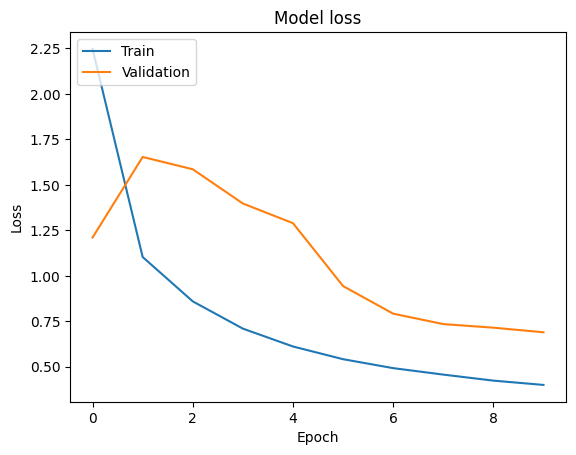

In [ ]:
# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Predicted Labels
pred = model.predict(x_test)
pred[:5]

477/477 [==============================] - 12s 22ms/step


array([[1.1535242, 4.4296894],
       [4.6140027, 3.5580285],
       [2.9596906, 3.2839403],
       [4.6258373, 1.1433547],
       [3.9599059, 4.493196 ]], dtype=float32)

In [ ]:
#Actual Labels and Predicted Labels comparison
print("Actual labels=")
print(y_test[:5])

print("Predicted labels=")
print(pred[:5])

Actual labels=
[[1. 5.]
 [5. 3.]
 [1. 5.]
 [2. 3.]
 [5. 5.]]
Predicted labels=
[[1.1535242 4.4296894]
 [4.6140027 3.5580285]
 [2.9596906 3.2839403]
 [4.6258373 1.1433547]
 [3.9599059 4.493196 ]]


In [ ]:
#defined clear text function for inputs
def clear_text(s):
  text = remove_links(s)
  text = remove_email(text)
  text = remove_extra_spaces(text)
  text = remove_extra_line(text)
  text = expand_contractions(text)
  text = remove_digits(text)
  text = convert_lower(text)
  text = tokenize(text)
  text = [lm.lemmatize(word) for word in text if word not in stopwords.words('english')]
  text = " ".join(text)
  return text

In [ ]:
#test case 1
s = input("Enter a comment = ")
s = clear_text(s)
one_hot_repr = [one_hot(s,voc_size)]
embedded_docs = pad_sequences(one_hot_repr,padding="post",maxlen=sent_len)
len(embedded_docs)

Enter a comment = Professor is really intelligent and best at his teaching and he teaches subject by making them easy


1

In [ ]:
#result 1
rate,diff = model.predict(embedded_docs).flatten()
print("Quality = {}".format(round(rate)))
print("Difficulty = {}".format(round(diff)))

1/1 [==============================] - 0s 42ms/step
Quality = 5
Difficulty = 1


In [ ]:
#test case 2
s = input("Enter a comment = ")
s = clear_text(s)
one_hot_repr = [one_hot(s,voc_size)]
embedded_docs = pad_sequences(one_hot_repr,padding="post",maxlen=sent_len)
len(embedded_docs)

Enter a comment =  professor's teaching is bad and unclear and his teaching is hard


1

In [ ]:
#result 2
rate,diff = model.predict(embedded_docs).flatten()
print("Quality = {}".format(round(rate)))
print("Difficulty = {}".format(round(diff)))

1/1 [==============================] - 0s 57ms/step
Quality = 1
Difficulty = 5


In [ ]:
#test case 3
s = input("Enter a comment = ")
s = clear_text(s)
one_hot_repr = [one_hot(s,voc_size)]
embedded_docs = pad_sequences(one_hot_repr,padding="post",maxlen=sent_len)
len(embedded_docs)

Enter a comment = He explains everything clearly.So subject seems to be okay.


1

In [ ]:
#result 3
rate,diff = model.predict(embedded_docs).flatten()
print("Quality = {}".format(round(rate)))
print("Difficulty = {}".format(round(diff)))

1/1 [==============================] - 0s 35ms/step
Quality = 3
Difficulty = 3
